<a href="https://colab.research.google.com/github/melih84/MNIST_data_with_PyTorch/blob/master/MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

In [32]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [33]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])


In [34]:
# Loading the data

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...
Done!


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [35]:
data_iter = iter(trainloader)
images,labels = data_iter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


(28, 28)

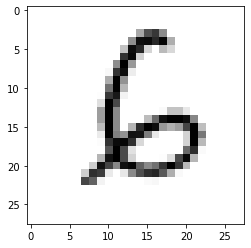

In [42]:
plt.imshow(images[12].numpy().squeeze(), cmap='gray_r')
images[0].numpy().squeeze().shape

In [44]:
input_size = 784 # 28x28
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [45]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logprobs = model(images) # log probabilites from LogSoftmax
loss = criterion(logprobs, labels)

In [46]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
time0 = time()
epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1) # Flatten images to 784 dimensional vector

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output,labels)

        loss.backward() # Backpropagation step

        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

    print("\nTraining time (in minutes) =", (time() - time0)/60)





Epoch 0 - Training loss: 0.42916068141616737

Training time (in minutes) = 0.18628754218419394
Epoch 1 - Training loss: 0.17243717476201337

Training time (in minutes) = 0.37236774365107217
Epoch 2 - Training loss: 0.12722343964867597

Training time (in minutes) = 0.5576576312383016
Epoch 3 - Training loss: 0.10357571625188469

Training time (in minutes) = 0.7426979184150696
Epoch 4 - Training loss: 0.08761169500291538

Training time (in minutes) = 0.9297207991282145
Epoch 5 - Training loss: 0.07703003235238749

Training time (in minutes) = 1.1215379039446514
Epoch 6 - Training loss: 0.0646664605598583

Training time (in minutes) = 1.3061968564987183
Epoch 7 - Training loss: 0.06054010008611202

Training time (in minutes) = 1.4897133191426595
Epoch 8 - Training loss: 0.05171050895094824

Training time (in minutes) = 1.6745755950609842
Epoch 9 - Training loss: 0.04814308853698338

Training time (in minutes) = 1.8588450829188028
Epoch 10 - Training loss: 0.03977463088800827

Training tim

**Now we want to calculate the accuracy**

In [50]:
correct_count = 0
all_count = 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logprobs = model(img)

        ps = torch.exp(logprobs)
        probability = list(ps.numpy()[0])
        pred_label = probability.index(max(probability))
        true_label = labels.numpy()[i]
        if true_label == pred_label:
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9772
